Ahmet Alperen Gungor, 28847
Elifnur Ozturk, 28857 
Ayse Sena Acar, 29506
Baris Bakirdoven, 29028

In [ ]:
# importing necessary modules
from sklearn.neighbors import KNeighborsClassifier
from keras.datasets import cifar10
from sklearn.metrics import accuracy_score
import numpy as np
import pickle
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("./drive")

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


In [ ]:
# data downloaded from cifar10 website, uploaded to drive
import tarfile
import os
zippedPath = "/content/drive/MyDrive/Data/cifar-10-python.tar.gz"
pathToExtract = "/content/drive/MyDrive/Data/"
tar = tarfile.open(zippedPath)
for member in tar.getmembers():
    member.name = os.path.basename(member.name)  # Remove any leading directories
    tar.extract(member, path=pathToExtract)

# Close the tar file
tar.close()

Starting fold 1
Epoch 1/20
625/625 [==============================] - 7s 8ms/step - loss: 2.0217 - accuracy: 0.3513 - val_loss: 1.9553 - val_accuracy: 0.3457
Epoch 2/20
625/625 [==============================] - 4s 6ms/step - loss: 1.7233 - accuracy: 0.4373 - val_loss: 1.7628 - val_accuracy: 0.3992
Epoch 3/20
625/625 [==============================] - 3s 5ms/step - loss: 1.5338 - accuracy: 0.4832 - val_loss: 1.4804 - val_accuracy: 0.4970
Epoch 4/20
625/625 [==============================] - 4s 6ms/step - loss: 1.3926 - accuracy: 0.5175 - val_loss: 1.3714 - val_accuracy: 0.5246
Epoch 5/20
625/625 [==============================] - 4s 7ms/step - loss: 1.2896 - accuracy: 0.5539 - val_loss: 1.4314 - val_accuracy: 0.5112
Epoch 6/20
625/625 [==============================] - 4s 6ms/step - loss: 1.1773 - accuracy: 0.5931 - val_loss: 1.3404 - val_accuracy: 0.5395
Epoch 7/20
625/625 [==============================] - 3s 6ms/step - loss: 1.1075 - accuracy: 0.6148 - val_loss: 1.2739 - val_accurac

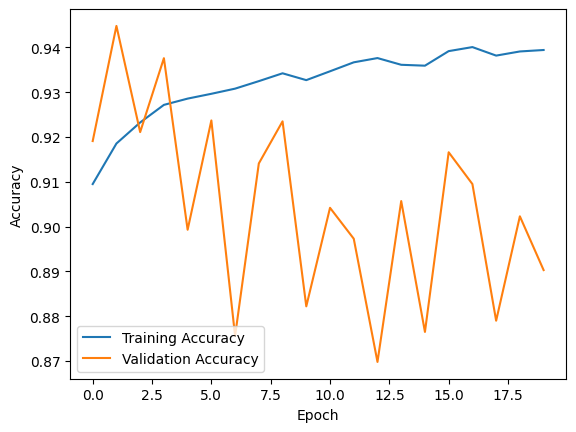

In [ ]:
# Function to load each batch file
def load_cifar_batch(file):
    with open("/content/drive/MyDrive/Data/" + file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict[b'data'], dict[b'labels']

# Define batch files
batch_files = ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5']
test_files = "test_batch"
# Perform 5-fold cross-validation using predefined batches in the data
accuracies = []

# Define the CNN model architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='softmax'))
model.add(layers.Dense(10))



x_test, y_test = load_cifar_batch(test_files)
x_test = x_test.reshape(-1, 3, 32, 32).transpose(0,2,3,1) / 255.0
y_test = np.array(y_test)

# Compile the model
model.compile(optimizer = "adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

for i in range(5):
    print(f"Starting fold {i+1}")
    
    # Load validation data from the current batch file
    x_val, y_val = load_cifar_batch(batch_files[i])
    x_val = x_val.reshape(-1, 3, 32, 32).transpose(0,2,3,1) / 255.0
    y_val = np.array(y_val)
    
    # Load training data from the other batch files
    x_train = []
    y_train = []
    for j in range(5):
        if j != i:
            x_batch, y_batch = load_cifar_batch(batch_files[j])
            x_batch = x_batch.reshape(-1, 3, 32, 32).transpose(0,2,3,1) / 255.0
            x_train.append(x_batch)
            y_train.append(y_batch)
    x_train = np.concatenate(x_train)
    y_train = np.concatenate(y_train)

    # Train the model
    history = model.fit(x_train, y_train, epochs=20, 
                        validation_data=(x_val, y_val), batch_size=64)

# Evaluate the model

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

# Plot the training accuracy and loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()